In [1]:
%run common_init.py

Start import
calculating effective efficiency for Xe detector done
calculating effective efficiency for Ge detector done
calculating effective efficiency for Ar detector done
calculating effective efficiency for Xe_migd detector done
calculating effective efficiency for Ge_migd detector done
calculating effective efficiency for Ar_migd detector done
Done import
SYSTEM
	Running on linux
	Python version 3.7.4 (default, Aug 13 2019, 20:35:49) [GCC 7.3.0]
	Python installation /home/joran/.conda/envs/DD_DM/bin/python
MODULES
	DirectDmTargets
		ver.:	0.2.0
		Path:	/mnt/c/Users/Joran/Google Drive/PhD-master/ubuntu-storage/windows-anaconda/DD_DM_targets/DirectDmTargets/

	wimprates
		ver.:	0.3.2
		Path:	/mnt/c/Users/Joran/Google Drive/PhD-master/ubuntu-storage/windows-anaconda/forked_wimprates/wimprates/



# Direct detection of Dark matter using different target materials #

Author:

Joran Angevaare <j.angevaare@nikef.nl>

Date:

14 october 2019 

## Goal ## 

- Roughly reproduce <https://journals.aps.org/prd/abstract/10.1103/PhysRevD.83.083505>
- Update the results thereof with more recent knowledge of the DM-distribution

### Approach ###
To achieve these goals, we must first get a decent recoil spectrum, that is flexible enough to have different astrophysical parameters. Further, it must also be flexible enough to be able to allow for different analytic functions to be added to the model. For instance, we must be able to incorporate the $\rm{SHM}^{++}$ as presented here <https://arxiv.org/abs/1810.11468>.

When we have a sufficiently flexible model, we want to add in the detector physics, we should therein incorporate at least the following parameters:
- target
  - material
  - cross-section
- threshold
- background
- cut efficiency  
- volume
- exposure

Finally we should perform the inference

## HALO model ##



f_params_XENON_230_544_0.30_-35.0_0.00
../../verne/results/veldists/tmp_f_params_XENON_230_544_0.30_-35.0_0.00_avg.csv
generating spectrum, this can take a minute. Execute:
python "../../verne/"/src/CalcVelDist.py -m_x 1 -sigma_p 1e-35 -loc XENON -path "../../verne//src/" -v_0 230 -v_esc 544 -save_as "../../verne/results/veldists/tmp_f_params_XENON_230_544_0.30_-35.0_0.00_avg.csv"  -n_gamma 2


/mnt/c/Users/Joran/Google Drive/PhD-master/ubuntu-storage/windows-anaconda/forked_wimprates/wimprates/halo.py:144: RuntimeWarning: divide by zero encountered in true_divide
  / (2 * v_earth_t * v))


../../verne/results/veldists/tmp_f_params_SUF_230_544_0.30_-35.0_0.00_avg.csv
generating spectrum, this can take a minute. Execute:
python "../../verne/"/src/CalcVelDist.py -m_x 1 -sigma_p 1e-35 -loc SUF -path "../../verne//src/" -v_0 230 -v_esc 544 -save_as "../../verne/results/veldists/tmp_f_params_SUF_230_544_0.30_-35.0_0.00_avg.csv"  -n_gamma 2


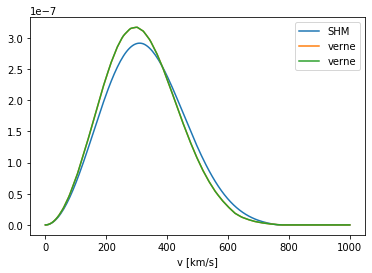

In [2]:
x = np.linspace(0,1000,200) * nu.km / nu.s
# y2 = wr.observed_speed_dist(x, 0)
# plt.plot(x/(nu.km / nu.s),y2)
# plt.axvline(310)
plt.xlabel("v [km/s]")
# plt.ylabel("$f (v)$")
use_SHM = dddm.SHM()
plt.plot(x/(nu.km / nu.s), use_SHM.velocity_dist(x,0), label = 'SHM')
test = dddm.VerneSHM(location="XENON")
print(test.fname)
# test.velocity_dist(100*nu.km/nu.s,0)
y2 = test.velocity_dist(x, 0)
plt.plot(x/(nu.km / nu.s), y2, label = 'verne')
plt.legend()
test = dddm.VerneSHM(location="SUF")
# test.velocity_dist(100*nu.km/nu.s,0)
y2 = test.velocity_dist(x, 0)
plt.plot(x/(nu.km / nu.s), y2, label = 'verne')
plt.legend()

In [3]:
energies = np.linspace(0.1, 3.5, 2) *  nu.keV
dr = wr.rate_migdal(energies, halo_model = test)
dr

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/joran/.conda/envs/DD_DM/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-f8a87ee95a28>", line 2, in <module>
    dr = wr.rate_migdal(energies, halo_model = test)
TypeError: rate_migdal() missing 2 required positional arguments: 'mw' and 'sigma_nucleon'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/joran/.conda/envs/DD_DM/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/joran/.conda/envs/DD_DM/lib/python3.7/site-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fix

TypeError: rate_migdal() missing 2 required positional arguments: 'mw' and 'sigma_nucleon'

In [ ]:
# !rm ../../verne/results/veldists/f_params_XENON_230_544_0.30_-35.0_0.00_avg.csv
# !rm ../../verne/results/veldists/f_params_SUF_230_544_0.30_-35.0_0.00_avg.csv

In [ ]:
assert False

In [ ]:
%time
energies = np.linspace(0.1, 3.5, 3)

# dr/dr
dr = ((nu.keV * (1000 * nu.kg) * nu.year) * 
    wr.rate_migdal(energies * nu.keV, 
                    mw=1 * nu.GeV/nu.c0**2, 
                    sigma_nucleon=1e-35 * nu.cm**2))

plt.plot(energies, dr, label="WIMPrates SHM")

plt.xlabel("Recoil energy [keV]")
plt.ylabel("Rate [events per (keV ton year)]")

plt.xlim(0, energies.max())
plt.yscale("log")

plt.ylim(1e-7,1e10)
plt.title("$m_\chi = 1$ GeV, $\sigma=10^{-35}$, no shielding")
plt.savefig("migdal_spec_2.png", dpi=300)

## Detector smearing

# Inference #
Below we setup the inference

## Distribution of the DM ##
First we need to make a DM-rate spectrum

In [ ]:
use_SHM = dddm.SHM()


In [ ]:
test = dddm.VerneSHM()
test.velocity_dist(100*nu.km/nu.s,1)


In [ ]:
x = np.linspace(0,1000,200) * nu.km / nu.s
# y2 = wr.observed_speed_dist(x, 0)
# plt.plot(x/(nu.km / nu.s),y2)
# plt.axvline(310)
plt.xlabel("v [km/s]")
# plt.ylabel("$f (v)$")
plt.plot(x/(nu.km / nu.s), test.velocity_dist(x,0), label = 'SHM')
test = dddm.VerneSHM(location="SUF")
# test.velocity_dist(100*nu.km/nu.s,0)
y2 = test.velocity_dist(x, 0)
plt.plot(x/(nu.km / nu.s), y2, label = 'verne')
plt.legend()

In [ ]:
3404985278.1905413/(nu.km/nu.s)

In [ ]:
def get_gal_spec(det):
    mw, sig = 1, 1e-35
    experiment = dddm.experiment[det]
    use_verne = dddm.VerneSHM(log_mass = np.log10(mw), 
                              log_cross_section = np.log10(sig),
                              location = experiment['location'])
    spec_class = dddm.GenSpectrum(mw, sig, use_verne, experiment)
#     spec_class.E_max = 1
#     spec_class.mw = 50
    spec_class.n_bins = 2
    return spec_class.get_data(poisson = False)

In [ ]:
# plot_spectrum(xe_galact, label = 'un-smeared', linestyle = '--')
fig,ax=plt.subplots(figsize = (8,6))
dddm.plot_spectrum(get_gal_spec('Xe_migd'), 'red', label = 'Xe target ', plot_error = False)
# dddm.plot_spectrum(get_gal_spec('Ge_migd'), 'green', label = 'Ge target', plot_error = False)
# dddm.plot_spectrum(get_gal_spec('Ar_migd'), 'orange', label = 'Ar target', plot_error = False)
plt.yscale("log")
plt.xlabel("Recoil energy [keV]")
plt.ylabel("Rate [events per (keV ton year)]")
plt.legend()

In [ ]:
def get_det_spec(det, mw =50):
    spec_class = dddm.DetectorSpectrum(1, 1e-35, use_SHM, dddm.experiment[det])
#     spec_class.E_max = 200
#     spec_class.mw = mw
    spec_class.n_bins = 20
    return spec_class.get_data(poisson = False)

In [ ]:
# plot_spectrum(xe_galact, label = 'un-smeared', linestyle = '--')
# %%time
fig,ax=plt.subplots(figsize = (8,6))
dddm.plot_spectrum(get_det_spec('Xe_migd'), 'red', label = 'Xe det. resolution', plot_error = False)
dddm.plot_spectrum(get_det_spec('Ge_migd'), 'green', label = 'Ge det. resolution', plot_error = False)
dddm.plot_spectrum(get_det_spec('Ar_migd'), 'orange', label = 'Ar det. resolution', plot_error = False)
plt.yscale("log")
plt.ylim(1e-7,1e7)
plt.xlabel("Recoil energy [keV]")
plt.ylabel("Rate [events per (keV ton year)]")
plt.legend()

# Likelihood profiling

In [ ]:
# dddm.plt_ll_sigma_spec()

In [ ]:
# dddm.plt_ll_sigma_det()

In [ ]:
# dddm.plt_ll_mass_spec()
# plt.ylim(-1000,0)

In [ ]:
# dddm.plt_ll_mass_det()
# plt.ylim(-1000,0)

# Nested sampling

In [ ]:
fit_class = dddm.MCMCStatModel('Xe_migd')
# fit_class.tol = 0.8
fit_class.nwalkers = 5
fit_class.nsteps = 10
# fit_class.nlive = 5
fit_class.set_prior('migdal')
fit_class.set_benchmark(mw = 1, sigma = -35)
print(f"Fitting for parameters:\n{fit_class.fit_parameters}")

In [ ]:
fit_class.run_emcee()

In [ ]:
fit_class.show_walkers()

In [ ]:
import os

In [ ]:
os.system("cd")

In [ ]:
fit_class.run_nestle()
fit_class.get_summary()

In [ ]:
fit_class.show_corner()

In [ ]:
assert False

In [ ]:
fit_unconstrained = dddm.NestleStatModel('Xe')
fit_unconstrained.tol = 0.8
fit_unconstrained.nlive = 2000
fit_unconstrained.set_fit_parameters(fit_unconstrained.known_parameters)
print(f"Fitting for parameters:\n{fit_unconstrained.fit_parameters}")

In [ ]:
fit_unconstrained.run_nestle()
fit_unconstrained.get_summary()

In [ ]:
fit_unconstrained.show_corner()

In [ ]:
print(1)